In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras import Sequential,Model
from tensorflow.python.keras import regularizers
from tensorflow.keras.layers import Dense,Dropout,Activation,MaxPooling2D,Flatten,Conv2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from skimage.transform import resize

In [4]:
fastion = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fastion.load_data()

In [5]:
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


In [ ]:
# X_train = X_train.reshape(-1,28,28,3)
# X_train.shape

In [6]:
X_train_t = np.stack([X_train.reshape(X_train.shape[0],28,28)]*3, axis=3).reshape(X_train.shape[0],28,28,3)
X_test_t = np.stack([X_test.reshape(X_test.shape[0],28,28)]*3, axis=3).reshape(X_test.shape[0],28,28,3)
X_train_t.shape, X_test_t.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [9]:
from tensorflow.keras.utils import img_to_array,array_to_img
x_train_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((48,48))) for im in X_train_t])
x_test_tt = np.asarray([img_to_array(array_to_img(im, scale=True).resize((48,48))) for im in X_test_t])
x_train_tt.shape, x_test_tt.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [10]:
print(x_train_tt.max())
print(x_train_tt.min())
X_train = x_train_tt/255.0
X_test = x_train_tt/255.0
print(X_train.max())
print(X_train.min())

255.0
0.0
1.0
0.0


In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_train.shape

In [ ]:
# X_test=np.dstack([X_test]).reshape(X_test.shape[0],32,32,3)
# X_test.shape

In [ ]:
# # Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

# xtrain=np.dstack([xtrain] * 3)
# xtest=np.dstack([xtest]*3)
# xtrain.shape,xtest.shape


# xtrain = xtrain.reshape(-1, 28,28,3)
# xtest= xtest.reshape (-1,28,28,3)
# xtrain.shape,xtest.shape


# xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
# xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
# #train_x = preprocess_input(x)
# xtrain.shape, xtest.shape

In [11]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


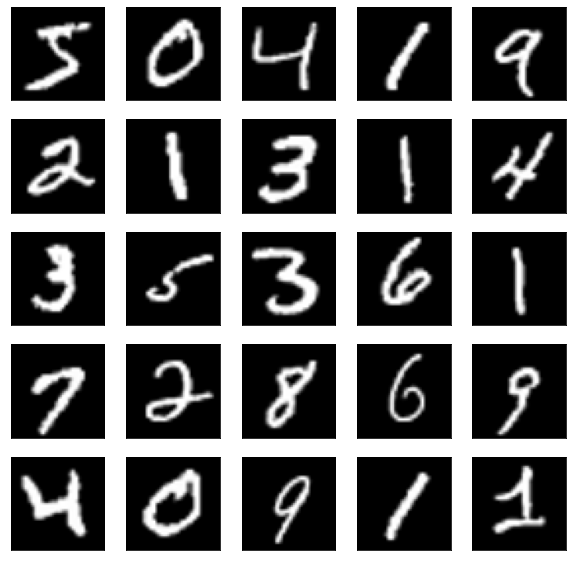

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    
plt.show()

In [13]:
base_model = VGG16(
    weights = "imagenet", 
    input_shape=(48, 48,3),
    include_top = False
)


for layers in base_model.layers:
    layers.trainable = False


def vgg16_pretrained():
    
    model = Sequential(
        [
            base_model,
            Flatten(),
            Dense(1024, activation='relu'), 
            Dense(256, activation='relu'),
            Dense(10, activation='softmax')
        ]
    )
    
    return model


In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [15]:
model = vgg16_pretrained()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15,504,970
Trainable params: 790,282
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 551s 326ms/step - loss: 0.2113 - accuracy: 0.9318 - val_loss: 0.1095 - val_accuracy: 0.9633
Epoch 2/10
1423/1688 [========================>.....] - ETA: 1:16 - loss: 0.1143 - accuracy: 0.9628

In [ ]:
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)